In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


log_paths  = {"4-bit": "local/output/runs/current/events.out.tfevents.1750933995.qat-0.510117.0"}

In [2]:
logs = {key: EventAccumulator(path) for key, path in log_paths.items()}

for log in logs.values():
    log.Reload()

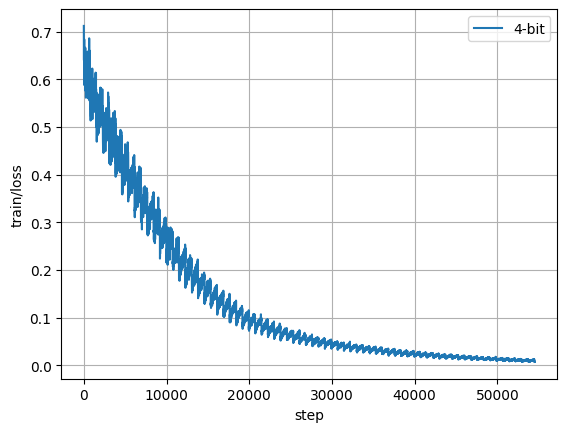

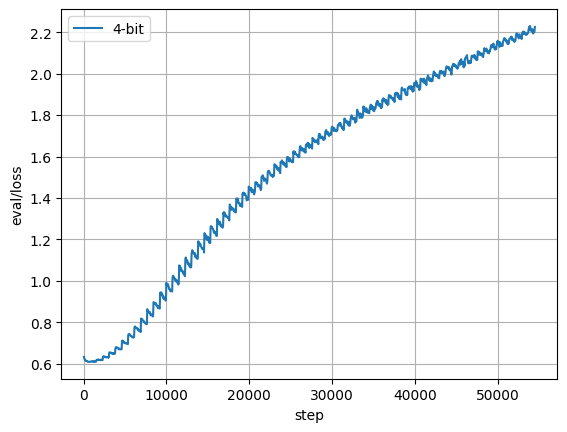

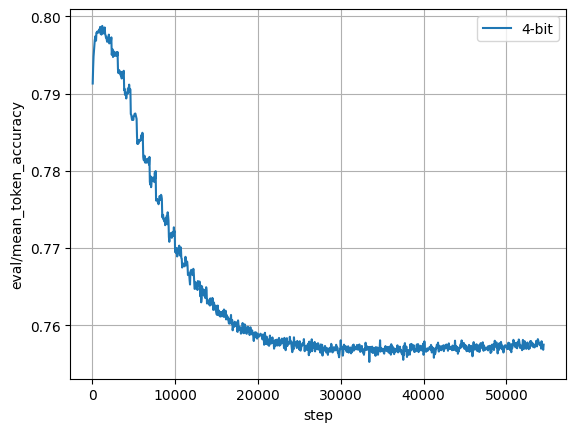

In [7]:
import matplotlib.pyplot as plt
import numpy as np

for key in ["train/loss", "eval/loss", "eval/mean_token_accuracy"]:
    for label, ea in logs.items():
        step = np.array([event.step for event in ea.Scalars(key)])
        value = np.array([event.value for event in ea.Scalars(key)])
        plt.plot(step, value, label=label)
        
    plt.grid()
    plt.xlabel("step")
    plt.ylabel(key)
    plt.legend()
    plt.show()

In [8]:
from datasets import load_from_disk  # type: ignore
from transformers import AutoTokenizer

ds = load_from_disk("local/qwen3-0.6b-dataset")["train"]
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B")

In [11]:
ds[-1].keys()

dict_keys(['input_ids', 'labels', 'attention_mask'])

In [5]:
lens = []

for i in range(1000):
    lens.append(len(ds[i]["input_ids"]))

In [7]:
import numpy as np

np.mean(lens), np.std(lens), np.max(lens), np.min(lens)

(np.float64(10138.767),
 np.float64(4931.082515301381),
 np.int64(16807),
 np.int64(620))

In [10]:
tokenizer.pad_token_type_id

0